In [3]:
NEED_TO_INSTALL_PACKAGES = False
if NEED_TO_INSTALL_PACKAGES:
    ! pip install bilby lalsimulation lalsuite
    
import bilby

In [4]:
from bilby.gw import conversion

#calculate the chirp mass from the component masses
chirp_mass = conversion.component_masses_to_chirp_mass(mass_1=60, mass_2=50)
print(chirp_mass)

47.642464144804954


In [5]:
POSSIBLE_KEYS = bilby.gw.prior.BBHPriorDict(aligned_spin=True).keys()
print(POSSIBLE_KEYS)

16:20 bilby INFO    : Using aligned spin prior
16:20 bilby INFO    : No prior given, using default BBH priors in /home/naga203/anaconda3/envs/grav/lib/python3.11/site-packages/bilby/gw/prior_files/aligned_spins_bbh.prior.


dict_keys(['mass_1', 'mass_2', 'mass_ratio', 'chirp_mass', 'luminosity_distance', 'dec', 'ra', 'theta_jn', 'psi', 'phase', 'chi_1', 'chi_2'])


In [6]:
### LET US SETUP SOME INJECTION PARAMETERS
injection_parameters = dict(
    mass_1 = 60,
    mass_2 = 50,
    mass_ratio = 0.8, #m2/m1
    chirp_mass = 47.642464144804954,
    chi_1 = 0.2,
    chi_2 = 0.3,
    luminosity_distance = 400,
    theta_jn = 1.4,
    psi = 2.0,
    ra = 1.375,
    dec = -0.7,
    phase = 1.2,
    geocent_time = 100,
)

In [7]:
waveform_arguments = dict(
    waveform_approximant = 'IMRPhenomPv2',
    reference_frequency = 50,
    minimum_frequency = 20,
    sampling_frequency = 1024,
    duration = 4,
    start_time = injection_parameters['geocent_time'] - 2,
)

In [8]:
waveform_generator = bilby.gw.WaveformGenerator(
    duration = waveform_arguments['duration'],
    sampling_frequency = waveform_arguments['sampling_frequency'],
    frequency_domain_source_model = bilby.gw.source.lal_binary_black_hole,
    parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments = waveform_arguments,
)

16:20 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


/home/naga203/anaconda3/envs/grav/lib/python3.11/site-packages/lalsimulation/lalsimulation.py:8: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal
16:20 bilby WARNING : There are unused waveform kwargs. This is deprecated behavior and will
result in an error in future releases. Make sure all of the waveform kwargs are correctly
spelled.

Unused waveform_kwargs: {'sampling_frequency': 1024, 'duration': 4, 'start_time': 98}



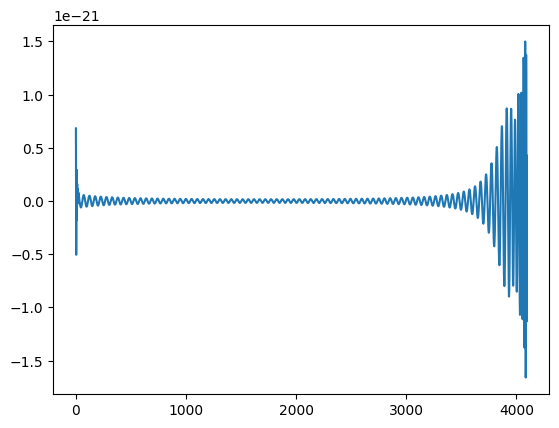

In [9]:
import matplotlib.pyplot as plt
plt.plot(waveform_generator.time_domain_strain(injection_parameters)['plus'])

In [10]:
ifos = bilby.gw.detector.InterferometerList(['H1', 'L1', 'V1'])
ifos_00 = bilby.gw.detector.InterferometerList(['H1', 'L1', 'V1'])

ifos.set_strain_data_from_power_spectral_densities(sampling_frequency=waveform_arguments['sampling_frequency'], 
                                                   duration=waveform_arguments['duration'], 
                                                   start_time=waveform_arguments['start_time'])

ifos_00.set_strain_data_from_zero_noise(sampling_frequency=waveform_arguments['sampling_frequency'],
                                        duration=waveform_arguments['duration'], 
                                        start_time=waveform_arguments['start_time'])

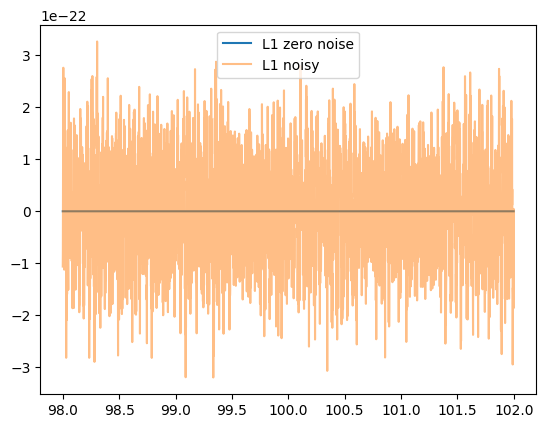

In [11]:
plt.plot(ifos_00[1].time_array, ifos_00[1].time_domain_strain, label='L1 zero noise')
plt.plot(ifos[1].time_array, ifos[1].time_domain_strain, label='L1 noisy', alpha=0.5)
plt.legend()

In [12]:
ifos.inject_signal(
    parameters=injection_parameters,
    waveform_generator=waveform_generator,
)

ifos_00.inject_signal(
    parameters=injection_parameters,
    waveform_generator=waveform_generator,
)

16:20 bilby WARNING : There are unused waveform kwargs. This is deprecated behavior and will
result in an error in future releases. Make sure all of the waveform kwargs are correctly
spelled.

Unused waveform_kwargs: {'sampling_frequency': 1024, 'duration': 4, 'start_time': 98}

16:20 bilby INFO    : Injected signal in H1:
16:20 bilby INFO    :   optimal SNR = 41.10
16:20 bilby INFO    :   matched filter SNR = 40.65-0.18j
16:20 bilby INFO    :   mass_1 = 60
16:20 bilby INFO    :   mass_2 = 50
16:20 bilby INFO    :   mass_ratio = 0.8
16:20 bilby INFO    :   chirp_mass = 47.642464144804954
16:20 bilby INFO    :   chi_1 = 0.2
16:20 bilby INFO    :   chi_2 = 0.3
16:20 bilby INFO    :   luminosity_distance = 400
16:20 bilby INFO    :   theta_jn = 1.4
16:20 bilby INFO    :   psi = 2.0
16:20 bilby INFO    :   ra = 1.375
16:20 bilby INFO    :   dec = -0.7
16:20 bilby INFO    :   phase = 1.2
16:20 bilby INFO    :   geocent_time = 100
16:20 bilby INFO    : Injected signal in L1:
16:20 bilby INFO

[{'plus': array([0.-0.j, 0.-0.j, 0.-0.j, ..., 0.-0.j, 0.-0.j, 0.-0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([0.-0.j, 0.-0.j, 0.-0.j, ..., 0.-0.j, 0.-0.j, 0.-0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([0.-0.j, 0.-0.j, 0.-0.j, ..., 0.-0.j, 0.-0.j, 0.-0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}]

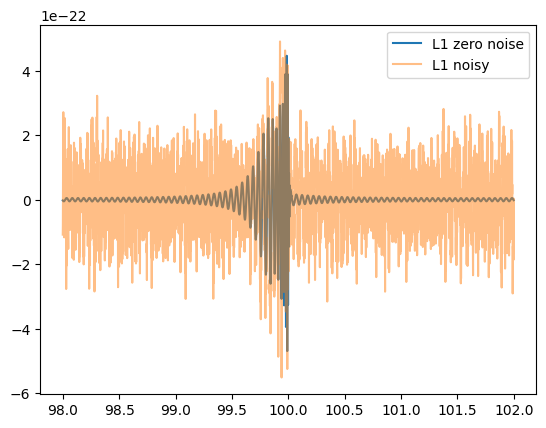

In [13]:
plt.plot(ifos_00[1].time_array, ifos_00[1].time_domain_strain, label='L1 zero noise')
plt.plot(ifos[1].time_array, ifos[1].time_domain_strain, label='L1 noisy', alpha=0.5)
plt.legend()

$p(\theta|d) = \dfrac{\mathcal{L}(d|\theta) p(\theta)}{\mathcal{Z(d)}}$

In [14]:
priors = bilby.gw.prior.BBHPriorDict(aligned_spin=True)
priors

16:20 bilby INFO    : Using aligned spin prior
16:20 bilby INFO    : No prior given, using default BBH priors in /home/naga203/anaconda3/envs/grav/lib/python3.11/site-packages/bilby/gw/prior_files/aligned_spins_bbh.prior.


{'mass_1': Constraint(minimum=5, maximum=100, name='mass_1', latex_label='$m_1$', unit=None),
 'mass_2': Constraint(minimum=5, maximum=100, name='mass_2', latex_label='$m_2$', unit=None),
 'mass_ratio': bilby.gw.prior.UniformInComponentsMassRatio(minimum=0.125, maximum=1, name='mass_ratio', latex_label='$q$', unit=None, boundary=None, equal_mass=False),
 'chirp_mass': bilby.gw.prior.UniformInComponentsChirpMass(minimum=25, maximum=100, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None),
 'luminosity_distance': bilby.gw.prior.UniformSourceFrame(minimum=100.0, maximum=5000.0, cosmology='Planck15', name='luminosity_distance', latex_label='$d_L$', unit='Mpc', boundary=None),
 'dec': Cosine(minimum=-1.5707963267948966, maximum=1.5707963267948966, name='dec', latex_label='$\\mathrm{DEC}$', unit=None, boundary=None),
 'ra': Uniform(minimum=0, maximum=6.283185307179586, name='ra', latex_label='$\\mathrm{RA}$', unit=None, boundary='periodic'),
 'theta_jn': Sine(minimum=0

In [15]:
keys_of_interest = ['chirp_mass', 'dec']
for key in priors.keys():
    if key not in keys_of_interest:
        priors[key] = injection_parameters[key]

priors['geocent_time'] = injection_parameters['geocent_time']

In [16]:
likelihood = bilby.gw.GravitationalWaveTransient(
    interferometers=ifos,
    waveform_generator=waveform_generator,
    priors=priors,
)

In [17]:
result = bilby.core.sampler.run_sampler(
    likelihood=likelihood,
    priors=priors,
    sampler='dynesty',
    outdir='./outdir',
    label='legends',
    nlive=500,
)

16:20 bilby INFO    : Running for label 'legends', output will be saved to './outdir'
16:20 bilby INFO    : Using lal version 7.6.1
16:20 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v7.25;Id: fafc22fe7c166517798534eeca175f27a66e0138;;Builder: Unknown User <>;Repository status: CLEAN: All modifications committed
16:20 bilby INFO    : Using lalsimulation version 6.1.0
16:20 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v7.25;Id: fafc22fe7c166517798534eeca175f27a66e0138;;Builder: Unknown User <>;Repository status: CLEAN: All modifications committed
16:20 bilby INFO    : Analysis priors:
16:20 bilby INFO    : chirp_mass=bilby.gw.prior.UniformInComponentsChirpMass(minimum=25, maximum=100, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None)
16:20 bilby INFO    : dec=Cosine(minimum=-1.5707963267948966, maximum=1.5707963267948966, name='dec', latex_label='$\\mathrm{DEC}$', unit=None, boundary=None)
16:20 bilby INFO    : m

4352it [00:00, ?it/s]

16:20 bilby INFO    : Written checkpoint file ./outdir/legends_resume.pickle
/home/naga203/anaconda3/envs/grav/lib/python3.11/site-packages/dynesty/plotting.py:252: RuntimeWarning: overflow encountered in exp
  np.exp(logwt), logz if logplot else np.exp(logz)
/home/naga203/anaconda3/envs/grav/lib/python3.11/site-packages/dynesty/plotting.py:282: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
16:20 bilby WARNING : Axis limits cannot be NaN or Inf
16:20 bilby WARNING : Failed to create dynesty run plot at checkpoint
16:20 bilby INFO    : Rejection sampling nested samples to obtain 1046 posterior samples
16:20 bilby INFO    : Sampling time: 0:01:06.343370


16:20 bilby INFO    : Summary of results:
nsamples: 1046
ln_noise_evidence: -7424.504
ln_evidence: -5824.347 +/-  0.134
ln_bayes_factor: 1600.157 +/-  0.134



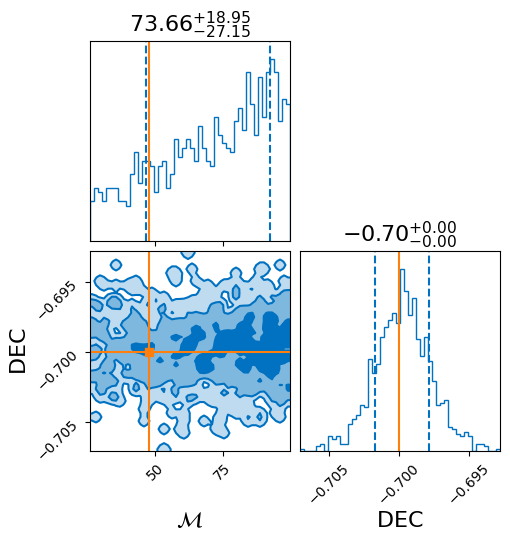

In [18]:
truths = {key:injection_parameters[key] for key in keys_of_interest}
result.plot_corner(truths=truths)